# Setup

In [1]:
import numpy as np
from numpy import random
import pickle
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from time import time

from dataset import Dataset

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Dataset Load

In [3]:
filename = 'datasets/amazon_co-ecommerce_sample.csv'

dataset = Dataset(filename)
dataset.load(text_field='name', label_field='category')

690 lines skipped (not labeled)
0 lines skipped (not text)


In [4]:
data_train, data_test = train_test_split(dataset.data, test_size=0.2)

# Embedding

### Vectorizer

In [5]:
vectorizer = dataset.vectorize()

tfidf_train = pd.DataFrame(vectorizer.transform(data_train.text).toarray())
tfidf_test  = pd.DataFrame(vectorizer.transform(data_test.text).toarray())

y_train = data_train.label
y_test  = data_test.label 

# Train Model

In [6]:
start = time() 
model = MultinomialNB(alpha=0.005).fit(tfidf_train, y_train)
print('Train time: %.2fs' % (time() - start))

Train time: 2.03s


# Evaluate

### Metrics

In [7]:
y_pred = model.predict(tfidf_test)

In [8]:
acc_train = round(100 * model.score(tfidf_train, y_train), 2)
acc_test  = round(100 * model.score(tfidf_test, y_test), 2)

print('Score Train: ', acc_train, '%')
print('Score Test:  ', acc_test, '%')

Score Train:  97.87 %
Score Test:   68.15 %


### Classification Report

**Precision** is percentage of samples correctly predicted to that category<br>
P = tp / (tp + fp), tp = true positive, fp = false positive <br><br>

**Recall** is percentage of samples of that category predicted correctly<br>
R    = tp / (tp + fn), tp = true positive, fn = false Negative <br><br>

In [9]:
class_report = metrics.classification_report(y_test, y_pred)
split = class_report.split('\n') 
for i, line in enumerate(split):
    s = line.split()
    if len(s) > 0:
        support   = s[-1]
        s.pop()
        f1_score  = s[-1]
        s.pop()
        recall    = s[-1]
        s.pop()
        precision = s[-1]
        s.pop()
        if len(s) <= 0:
            label = 'label'
        else:
            label = ' '.join(s)
        split[i] = [label, precision, recall, f1_score, support]
    else: 
        split[i] = ['']

/anaconda2/envs/CnnEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda2/envs/CnnEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [10]:
df = pd.DataFrame(split)
df.columns = df.loc[0]
df = df.drop([0])
df = df.dropna()

print('Classification Report')
df[-10:]

Classification Report


,label,precision,recall,f1-score,support
155,sports toys & outdoor > climbing frames,0.00,0.00,0.00,1
156,sports toys & outdoor > darts & accessories,1.00,1.00,1.00,3
157,sports toys & outdoor > garden tools,0.43,0.50,0.46,6
158,sports toys & outdoor > kites & flight toys,0.88,0.61,0.72,23
159,sports toys & outdoor > racket games,0.00,0.00,0.00,1
160,women > accessories > eyewear & accessories > ...,0.00,0.00,0.00,1
161,worlds apart > kid venture > kites,1.00,1.00,1.00,2
163,micro avg,0.68,0.68,0.68,1862
164,macro avg,0.37,0.35,0.35,1862
165,weighted avg,0.66,0.68,0.66,1862


### Confusion Matrix

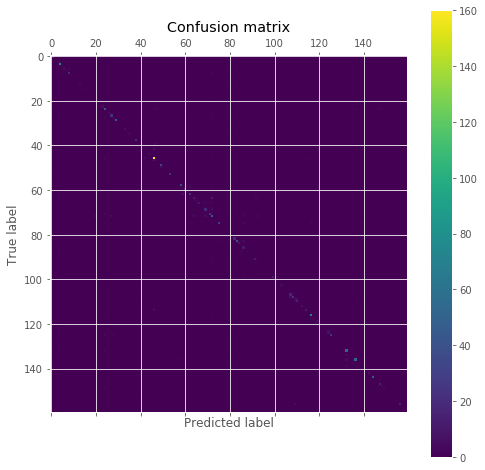

In [11]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.matshow(cm)
plt.colorbar()
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.gcf().set_size_inches(8, 8)
plt.show()

# Save Model

In [12]:
PATH_MODELS = 'trained_models/'
FILE_MODEL  = PATH_MODELS + 'model_mnb.sav'

In [13]:
pickle.dump(model, open(FILE_MODEL, 'wb'))